In [1]:
from google.colab import drive
drive.mount("/content/drive")

# Direct to your assignment folder.
%cd /content/drive/MyDrive/ML_P2_Illustrations

%load_ext autoreload
%autoreload 1

# Install
!pip install torch torchvision torchaudio ultralytics supervision
!!pip install transformers accelerate sentencepiece



Mounted at /content/drive
/content/drive/MyDrive/ML_P2_Illustrations
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.0 MB/s eta 0:00:00


['Requirement already satisfied: transformers in /usr/local/lib/python3.10/dist-packages (4.46.3)',
 'Requirement already satisfied: accelerate in /usr/local/lib/python3.10/dist-packages (1.1.1)',
 'Requirement already satisfied: sentencepiece in /usr/local/lib/python3.10/dist-packages (0.2.0)',
 'Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from transformers) (3.16.1)',
 'Requirement already satisfied: huggingface-hub<1.0,>=0.23.2 in /usr/local/lib/python3.10/dist-packages (from transformers) (0.26.5)',
 'Requirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.10/dist-packages (from transformers) (1.26.4)',
 'Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from transformers) (24.2)',
 'Requirement already satisfied: pyyaml>=5.1 in /usr/local/lib/python3.10/dist-packages (from transformers) (6.0.2)',
 'Requirement already satisfied: regex!=2019.12.17 in /usr/local/lib/python3.10/dist-packages

Total Images: 679
Total Entities: 149433

Distribution of Images per Book:
count    2460.000000
mean       11.625203
std        18.931572
min         1.000000
25%         3.000000
50%         6.000000
75%        12.000000
max       237.000000
Name: page, dtype: float64

Distribution of Entities per Image:
count    28598.000000
mean         5.225295
std          4.470617
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         61.000000
Name: entity_class, dtype: float64

Classification Distribution:
classification
Human      15017
Neither     6631
Both        4693
Animal      2257
Name: count, dtype: int64

Top 20 Entity Class Distribution:
entity_class
person            74001
book              19148
horse              7726
bird               6774
chair              4006
dog                3657
clock              3294
cat                1993
tie                1942
vase               1682
boat               1651
bench              1633
potted 

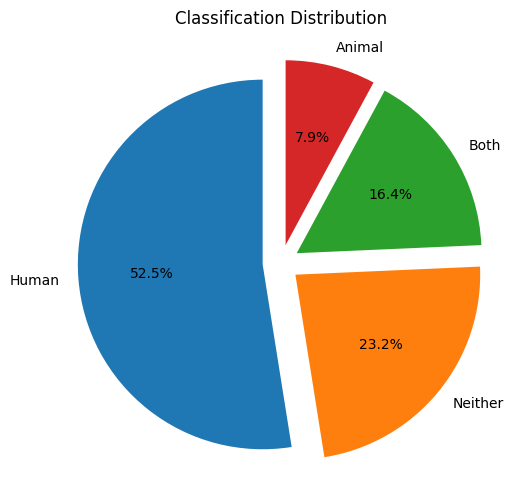

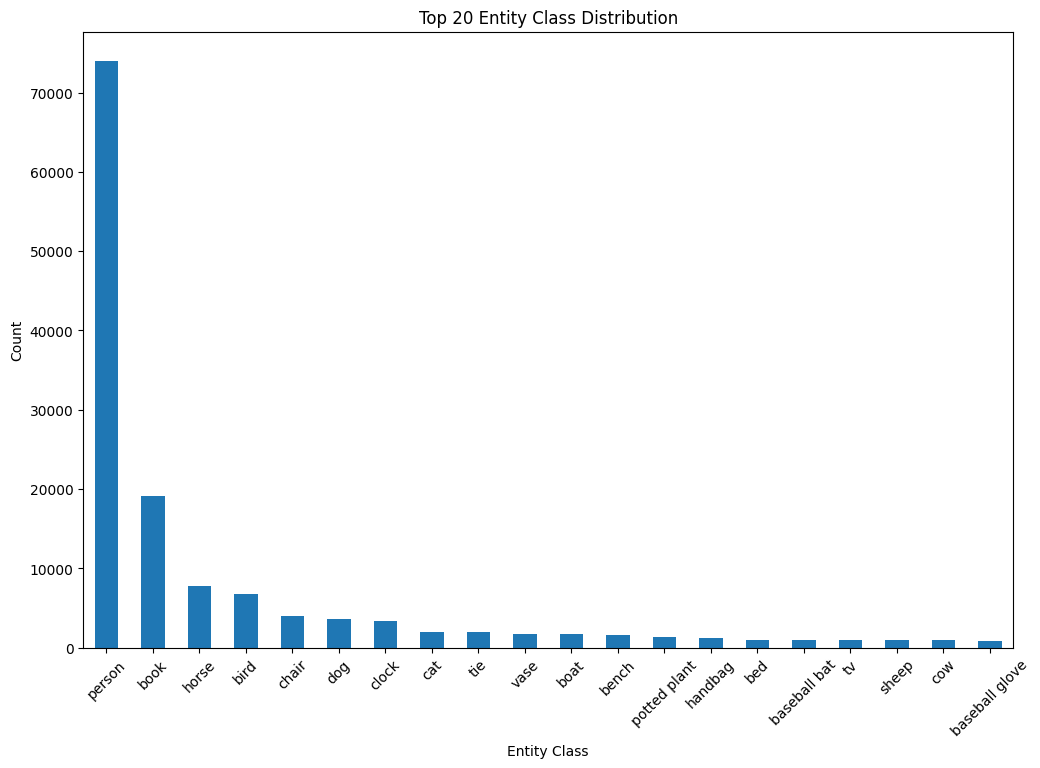

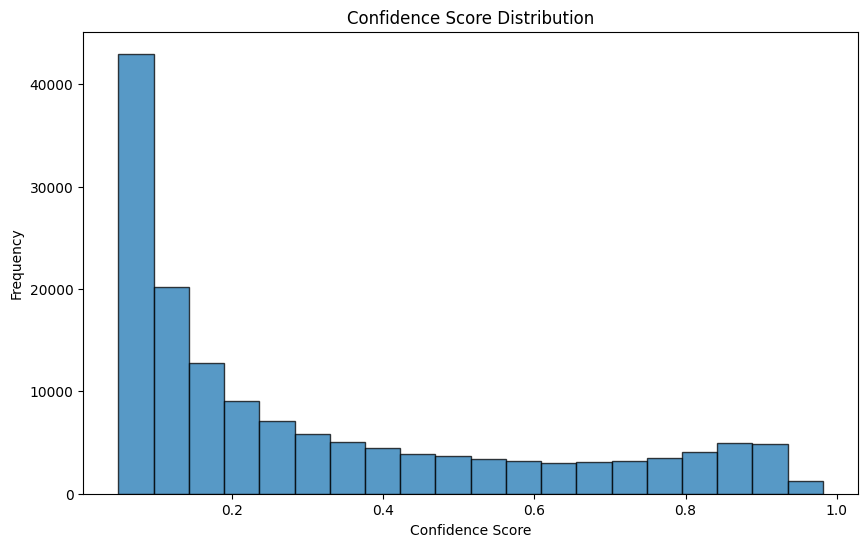

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the base folder
base_folder = "preprocessed_all"

# Initialize lists for consolidated data
flat_data = []  # For flattened analysis

# Merge JSON files from all subfolders
for subfolder in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    json_file_path = os.path.join(subfolder_path, "detections.json")
    if os.path.exists(json_file_path):
        with open(json_file_path, 'r') as f:
            subfolder_data = json.load(f)
            book_name = subfolder_data.get("book_name", subfolder)

            # Flatten image-level data for analysis
            for page in subfolder_data.get("pages", []):
                flat_page_data = {
                    "book_name": book_name,
                    "page": page["page"],
                    "classification": page["classification"],
                    "caption": page["caption"],
                }
                # Add each entity separately
                for entity in page.get("detected_entities", []):
                    flat_data.append({
                        **flat_page_data,
                        "entity_class": entity["class"],
                        "confidence": entity["confidence"],
                        "bounding_box": entity["bounding_box"]
                    })

# Convert to DataFrame
df = pd.DataFrame(flat_data)

# Summary Statistics
total_images = df["page"].nunique()
total_entities = len(df)
images_per_book = df.groupby("book_name")["page"].nunique()
entities_per_image = df.groupby(["book_name", "page"])["entity_class"].count()

print(f"Total Images: {total_images}")
print(f"Total Entities: {total_entities}")
print("\nDistribution of Images per Book:")
print(images_per_book.describe())
print("\nDistribution of Entities per Image:")
print(entities_per_image.describe())

# Classification Distribution
classification_counts = df.groupby(["book_name", "page"]).first()["classification"].value_counts()
print("\nClassification Distribution:")
print(classification_counts)

# Entity Class Distribution (Top 20)
entity_class_counts = df["entity_class"].value_counts().head(20)
print("\nTop 20 Entity Class Distribution:")
print(entity_class_counts)

# Confidence Score Distribution
confidence_scores = df["confidence"]

# Visualizations
# Classification Distribution
plt.figure(figsize=(6, 6))
classification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0.1, 0.1, 0.1, 0.1))
plt.title("Classification Distribution")
plt.ylabel("")  # Remove default y-axis label
plt.show()

# Top 20 Entity Class Distribution
plt.figure(figsize=(12, 8))
entity_class_counts.plot(kind='bar')
plt.title("Top 20 Entity Class Distribution")
plt.xlabel("Entity Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Confidence Score Histogram
plt.figure(figsize=(10, 6))
plt.hist(confidence_scores, bins=20, alpha=0.75, edgecolor="black")
plt.title("Confidence Score Distribution")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()


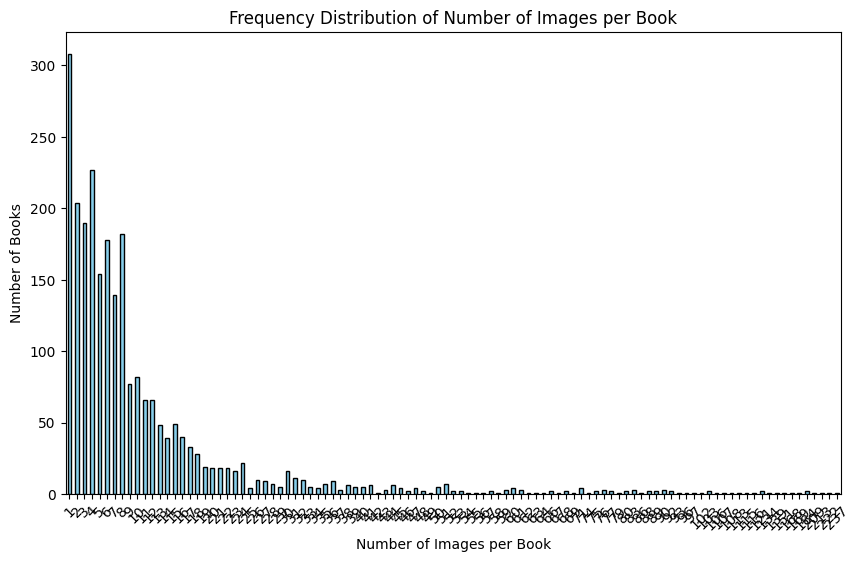

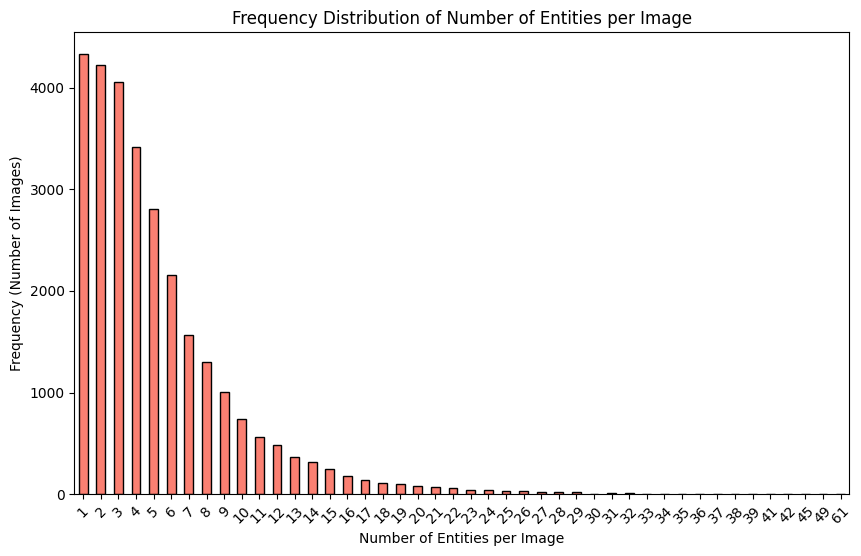

In [ ]:
# Frequency distribution of number of images per book
image_count_freq = images_per_book.value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
image_count_freq.plot(kind='bar', color='skyblue', edgecolor="black")
plt.title("Frequency Distribution of Number of Images per Book")
plt.xlabel("Number of Images per Book")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)  # Adjust rotation for better readability
plt.show()

# Frequency distribution of number of entities per image
entity_count_freq = entities_per_image.value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
entity_count_freq.plot(kind='bar', color='salmon', edgecolor="black")
plt.title("Frequency Distribution of Number of Entities per Image")
plt.xlabel("Number of Entities per Image")
plt.ylabel("Frequency (Number of Images)")
plt.xticks(rotation=45)  # Adjust rotation for better readability
plt.show()
